# Do Zero ao Som: Criando Áudio Digital com Python

In [54]:
# Antes de tudo, instale as dependências

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import ipywidgets as widgets
from ipywidgets import interactive
from scipy.io import wavfile

## Introdução

*Como o computador processa uma música digitalmente?*

*Como podemos entender uma representação digital de um sinal de áudio?*

*Como podemos criar sons com o auxílio do computador?*

Neste workshop, vamos entender um pouco sobre o que é um sinal de áudio digital e como podemos criar um sinal de áudio digital a partir do zero utilizando Python. Tudo isso de maneira interativa e prática.

Divirta-se!

## Som e Sinal

Vamos ganhar uma intuição intuição inicial sobre o que é som e o que é sinal sonoro. Essas definições são importantes para entendermos o que estamos fazendo quando mexemos com áudio digital.

### O que é som?

**Som** é um fenômeno físico que ocorre quando moléculas de ar (ou outro meio elástico) se comprimem e rarefazem rapidamente.
Alto-falantes, por exemplo, movem-se para frente e para trás rapidamente, comprimindo e rarefazendo o ar, criando som.
Por sua vez, nossos ouvidos são capazes de captar essas variações de pressão do ar e transformá-las em sinais elétricos que são enviados ao nosso cérebro.

Podemos modelar esse movimento do ar com a ajuda da matemática e de computadores.

### O que é sinal sonoro?

Um **sinal sonoro** é uma função matemática que descreve a variação de pressão do ar ou tensão elétrica ao longo do tempo.

Podemos visualizar um sinal sonoro com um gráfico onde o eixo horizontal representa o tempo e o eixo vertical representa a intensidade do som em cada instante de tempo.

Caso você nunca tenha visto a onda de uma música antes, observe o sinal dos primeiros 60 segundos da música "No Ordinary Love" da cantora Sade no software Audacity.

---

*This is no ordinary love...*

---

### Sinais analógicos e digitais

Consegue perceber que temos vários pontos no gráfico da onda sonora? Cada um desses pontos representa a intensidade do som em um instante de tempo.
Por isso, podemos dizer que esse sinal sonoro é **discreto** ou **digital**.

Portanto, podemos imaginar um arquivo de áudio como uma grande lista de números.

In [55]:
sample_rate, audio_file = wavfile.read('Sade-No_Ordinary_Love-60s.wav')

# Mostra o NumPy Dtype
print(audio_file.dtype) # int16, de [-32768, +32767]

# Imprime uma parte do arquivo de áudio
print(audio_file[480000:480000+10])

int16
[[-11313 -14304]
 [-10939 -14153]
 [-11831 -14842]
 [-12245 -15099]
 [-11796 -14719]
 [-11042 -13983]
 [-11059 -13645]
 [-10910 -13119]
 [ -9690 -11869]
 [ -9067 -11190]]


> Dizemos que um sinal sonoro é **analógico** quando a função está definida para todos os instantes no tempo. Ou seja, o sinal sonoro é **contínuo**. Sinais analógicos estão presentes no mundo real, como o som que ouvimos, e também em equipamentos de áudio, como microfones e alto-falantes.
>
> Dizemos que um sinal sonoro é **digital** quando a função está definida apenas para uma lista finita de instantes no tempo. Ou seja, o sinal sonoro é **discreto**. Sinais digitais são utilizados em computadores e equipamentos digitais.

## Amostragem e Quantização

Agora sabemos que um sinal sonoro digital é discretizado no eixo do tempo e também no eixo da amplitude. Mas como isso é feito? Vamos entender um pouco sobre **amostragem** e **quantização**.

> **Amostragem** é o processo de discretização do sinal no eixo do **tempo**.
>
> Definimos a **taxa de amostragem** como o número de amostras por segundo. A unidade de medida é **Hertz** (Hz). É comum vermos taxas de amostragem de 44.1 kHz, 48 kHz, 96 kHz, etc.

> **Quantização** é o processo de discretização do sinal no eixo da **amplitude**.
>
> Definimos a **resolução** como o número de níveis de amplitude possíveis. A unidade de medida é **bits**. É comum vermos resoluções de potência de 2, como 8 bits, 16 bits, 24 bits, etc.

In [56]:
# Ambiente interativo para a visualização de um sinal

def plot_signal(samples=44100, bits=16, freq=440):
    # Sinal contínuo
    # t = np.linspace(0, 1, 1000)
    # original = np.sin(2 * np.pi * freq * t)
    
    # Amostragem
    t_sampled = np.linspace(0, 1, samples)
    sampled = np.sin(2 * np.pi * freq * t_sampled)
    
    # Quantização
    levels = 2**bits
    quantized = np.round(sampled * (levels/2)) / (levels/2)
    
    # Plot
    plt.figure(figsize=(18, 6))
    # plt.plot(t, original, 'b-', label='Sinal Original', alpha=0.5)
    plt.plot(t_sampled, quantized, 'r.', label='Sinal Digital')
    plt.grid(True)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Senoide - {freq} Hz, {bits} bits')
    plt.legend()
    plt.show()

# Interface interativa
interactive_plot = interactive(
    plot_signal,
    samples=widgets.IntSlider(min=0, max=1000, step=1, value=44100),
    bits=widgets.IntSlider(min=1, max=32, step=1, value=32),
    freq=widgets.IntSlider(min=1, max=10, step=1, value=1)
)
display(interactive_plot)

interactive(children=(IntSlider(value=1000, description='samples', max=1000), IntSlider(value=32, description=…

## Sinais elementares

Vamos estudar alguns sinais elementares que são importantes para entendermos o som. São eles: ruídos e sinais periódicos.

### Ruídos

Em computação musical, **ruído** não possui uma definição categórica, mas é comum entendermos ele como um sinal sonoro que:

* Não possui uma altura musical definida
* Não costuma ser periódico

Uma caracterização comum de ruídos é por sua **densidade espectral**, ou seja, a distribuição de energia do sinal em função da frequência. Esses ruídos possuem nomes de cores, como **branco**, **vermelho**, **rosa**, etc.

Vamos sintetizar e ouvir os ruídos branco e vermelho.

**ATENÇÃO: ABAIXE (MUITO) O VOLUME DO SEU COMPUTADOR ANTES DE OUVIR OS ÁUDIOS.**

#### Ruído branco

O **ruído branco** é um sinal sonoro que possui energia uniformemente distribuída em todas as frequências audíveis.

Talvez você já tenha ouvido ruído branco em um rádio fora de sintonia ou em uma televisão sem sinal. Esse som incomoda muito!

Vamos sintetizar um ruído branco e ouvi-lo:

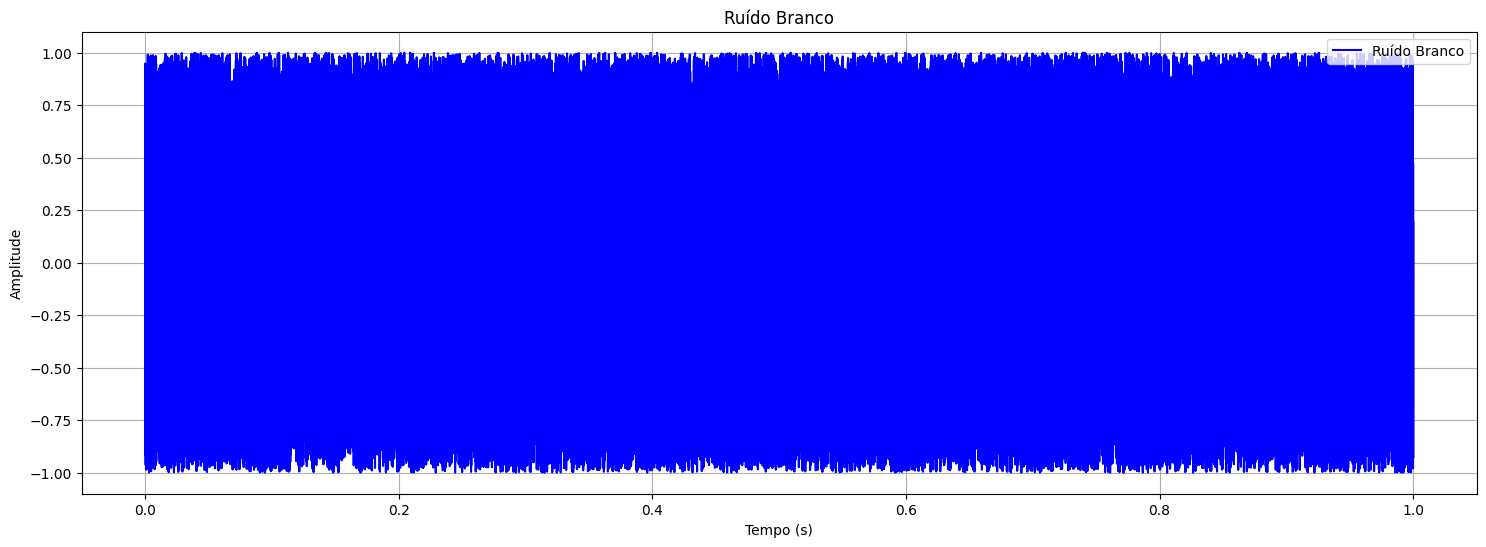

In [10]:
# Ruído branco

def ruido_branco():
    amostras = 44100

    # Gera o ruído branco por 1 segundo
    t = np.linspace(0, 1, 1 * amostras)
    sinal = np.random.uniform(-1, 1, amostras)
    
    # Gera o gráfico
    plt.figure(figsize=(18, 6))
    plt.plot(t, sinal, 'b-', label='Ruído Branco')
    plt.grid(True)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title('Ruído Branco')
    plt.legend()
    plt.show()

    # Reproduz o sinal
    display(Audio(sinal, rate=amostras))
    
ruido_branco()
    

#### Ruído vermelho

O **ruído vermelho** é um ruído que possui energia inversamente proporcional à frequência. Isso significa que ele possui mais energia em frequências baixas e menos energia em frequências altas.

O ruído vermelho é um ruído mais agradável de se ouvir do que o ruído branco.

Vamos sintetizar um ruído vermelho e ouvi-lo:

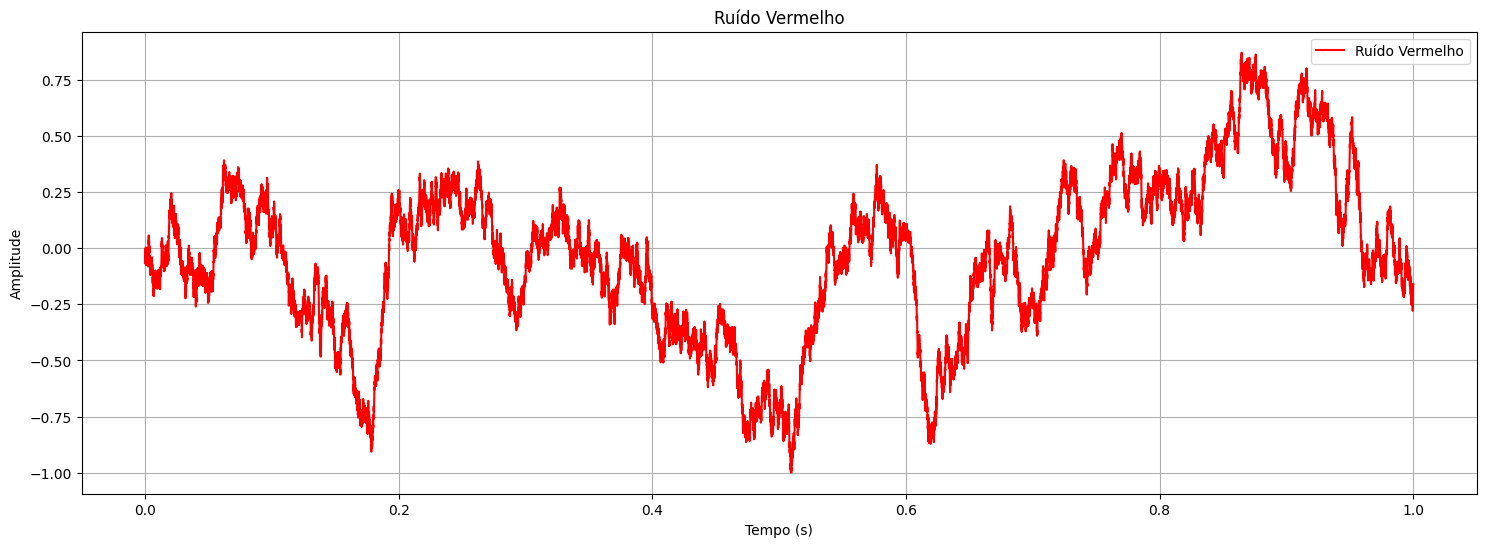

In [11]:
# Ruído vermelho

def ruido_vermelho():
    amostras = 44100

    # Gera o ruído vermelho por 1 segundo
    t = np.linspace(0, 1, amostras)
    branco = np.random.uniform(-1, 1, amostras)
    vermelho = np.zeros(1 * amostras)
    vermelho[0] = branco[0]
    for i in range(1, amostras):
        vermelho[i] = branco[i] + vermelho[i - 1]
    vermelho = vermelho / np.max(np.abs(vermelho))
    
    # Gera o gráfico
    plt.figure(figsize=(18, 6))
    plt.plot(t, vermelho, 'r-', label='Ruído Vermelho')
    plt.grid(True)
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.title('Ruído Vermelho')
    plt.legend()
    plt.show()

    # Reproduz o sinal
    display(Audio(vermelho, rate=amostras))
    
ruido_vermelho()

#### *Qual a utilidade de ruídos na computação musical?*

A partir de um ruído, podemos modificá-lo (com filtros, *envelopes*, efeitos, etc.) para criar sons mais complexos e também mais musicais.

### Sinais periódicos

Os sinais periódicos elementares são as **ondas senoidais**, **ondas quadradas** e **ondas triangulares**.

## ADSR

O som de um instrumento musical não é composto apenas pelo seu caráter harmônico, mas também pela sua **variação dinâmica** ao longo do tempo.

*O quanto demora para o som atingir o volume máximo?*

*O quanto demora para o som atingir o volume mínimo?*

*O quanto o som mantém o volume máximo?*

*O quanto demora para o som atingir o volume zero?*

Essas perguntas são respondidas pelo conceito de **envelope sonoro**.

Um **envelope sonoro** é uma função que descreve a variação da amplitude de um sinal ao longo do tempo.

**ADSR** é um acrônimo para **Attack**, **Decay**, **Sustain** e **Release**. É um modelo de envelope sonoro muito utilizado na síntese de áudio. Aplicado a um sinal sonoro, o ADSR colabora para a percepção um som como parte de um "instrumento musical".

Vamos ouvir alguns exemplos de ADSR em ação.

---

*Hora de abrir o Ableton Live...*

---

Vamos estudar cada uma das etapas do ADSR:

1. **Attack**: é o tempo que o sinal leva para atingir o seu valor máximo. O ataque é o início do som.
2. **Decay**: é o tempo que o sinal leva para atingir o valor de sustentação.
3. **Sustain**: é o valor que o sinal mantém enquanto a tecla do instrumento é pressionada.
4. **Release**: é o tempo que o sinal leva para atingir o valor zero após a tecla do instrumento ser solta.

## Modulação AM